In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta
import csv

API keys can be found here: https://twelvedata.com/account/api-keys

In [2]:
# Function to read API key from CSV
def get_api_key(file_path, service_name):
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['service'] == service_name:
                return row['key']
    raise ValueError(f"API key for {service_name} not found in the CSV file")

In [3]:
# Twelve Data API endpoint and API key
BASE_URL = "https://api.twelvedata.com/time_series"

# Get API key from CSV file
API_KEY = get_api_key('api_keys.csv', 'twelve_data')

# Set up parameters for the API request
symbol = "US2Y"  # Symbol for 2-Year U.S. Treasury Bond Yield
interval = "1day"  # Daily interval
end_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
start_date = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%d %H:%M:%S")  # Last 30 days

params = {
    "symbol": symbol,
    "interval": interval,
    "apikey": API_KEY,
    "start_date": start_date,
    "end_date": end_date
}

response = requests.get(BASE_URL, params=params)

    datetime     open     high      low    close volume    yield
4 2024-12-04  4.18400  4.21000  4.11500  4.12870      0  4.12870
3 2024-12-05  4.13600  4.17700  4.13400  4.14295      0  4.14295
2 2024-12-06  4.15000  4.22700  4.07700  4.09560      0  4.09560
1 2024-12-08  4.10000  4.10190  4.09980  4.09980      0  4.09980
0 2024-12-09  4.09800  4.10810  4.09800  4.10780      0  4.10780
Current yield: 4.11% at 2024-12-09 00:00:00


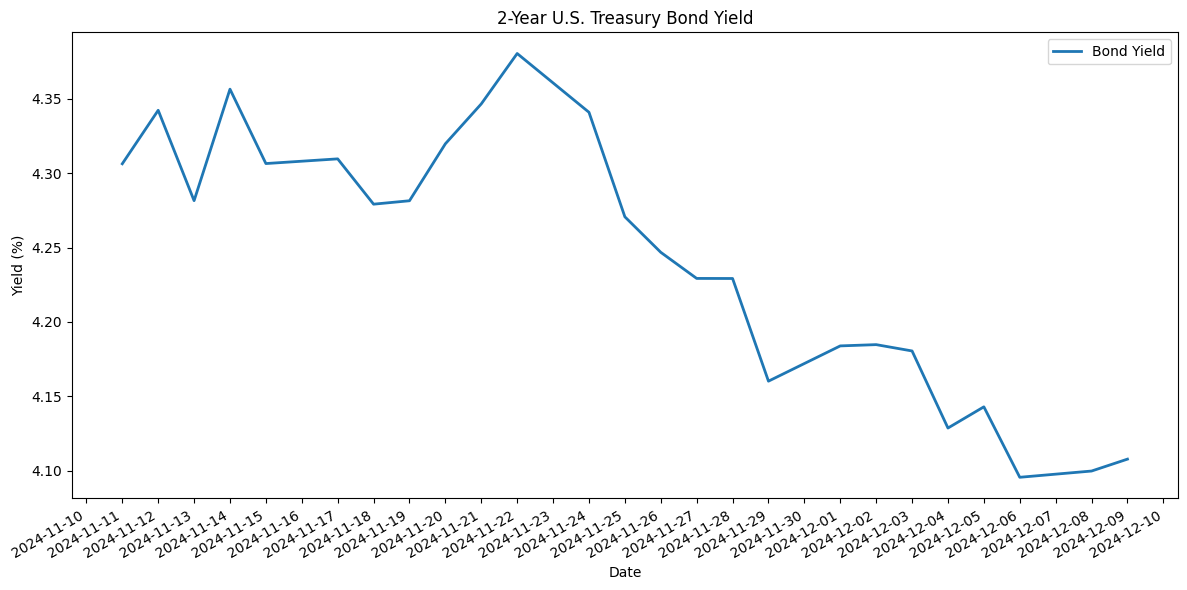

In [4]:
if response.status_code == 200:
    data = response.json()
    
    if "values" in data and data["values"]:
        # Convert the data to a pandas DataFrame
        df = pd.DataFrame(data["values"])
        
        # Convert datetime and numeric columns
        df["datetime"] = pd.to_datetime(df["datetime"])
        df["yield"] = pd.to_numeric(df["close"])  # Using 'close' as the yield price
        
        # Sort the DataFrame by date
        df = df.sort_values("datetime")
        
        print(df.tail())

        # Get current yield (most recent yield in the data)
        current_yield = df["yield"].iloc[-1]
        current_time = df["datetime"].iloc[-1]
        print(f"Current yield: {current_yield:.2f}% at {current_time}")

        # Plotting
        fig, ax = plt.subplots(figsize=(12, 6))

        df.plot(x='datetime', y='yield', ax=ax, linewidth=2)

        plt.title('2-Year U.S. Treasury Bond Yield')
        plt.xlabel('Date')
        plt.ylabel('Yield (%)')
        plt.xticks(rotation=45, ha='right')

        # Set major locator to days
        ax.xaxis.set_major_locator(mdates.DayLocator())

        # Define a custom formatter function for displaying dates
        def date_formatter(x, pos):
            date = mdates.num2date(x)
            return date.strftime('%Y-%m-%d')

        ax.xaxis.set_major_formatter(FuncFormatter(date_formatter))
        plt.gcf().autofmt_xdate()

        plt.legend(['Bond Yield'])

        plt.tight_layout()
        plt.show()
    else:
        print("No data found in the response")
else:
    print(f"Error: {response.status_code}")
    print(response.text)